# **Linear regression**

## **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## **Linear regression**

In [2]:
class Linear_regression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, reg_lambda=0.001):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.reg_lambda = reg_lambda
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_rows, n_columns = X.shape

        self.w = np.random.rand(n_columns)
        self.b = 0
        
        for i in range(self.n_iterations):
            predict = self.predict(X)
            
            err = (predict - y).reshape(-1)

            d_w = 2 * np.dot(np.transpose(X), err) / n_rows
            d_b = 2 * np.sum(predict - y) / n_rows

            self.w -= self.learning_rate * (d_w + 2 * self.reg_lambda * self.w)
            self.b -= self.learning_rate * d_b

    def predict(self, X):
        return (np.dot(X, self.w) + self.b).reshape(-1, 1)

## **Working with data**

### **Load data**

In [3]:
path = "D://admp_northallerton/my_machine_learning/datasets/regression_dataset.csv"

data = pd.read_csv(path)
data

,x,x**2,x**3,x**4,x**5,x**6,x**7,y
0,-2.000000,4.000000,-8.000000,16.000000,-32.000000,64.000000,-128.000000,-0.270671
1,-1.988848,3.955515,-7.866916,15.646097,-31.117701,61.888365,-123.086526,-0.272180
2,-1.977695,3.911278,-7.735316,15.298097,-30.254972,59.835113,-118.335613,-0.273689
3,-1.966543,3.867290,-7.605192,14.955935,-29.411485,57.838944,-113.742755,-0.275198
4,-1.955390,3.823551,-7.476535,14.619545,-28.586917,55.898581,-109.303545,-0.276706
...,...,...,...,...,...,...,...,...
265,0.955390,0.912771,0.872052,0.833150,0.795984,0.760475,0.726551,2.483714
266,0.966543,0.934205,0.902949,0.872739,0.843539,0.815317,0.788039,2.540886
267,0.977695,0.955888,0.934567,0.913722,0.893341,0.873415,0.853934,2.599029
268,0.988848,0.977820,0.966914,0.956131,0.945468,0.934924,0.924497,2.658156


### **Preprocessing**

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## **Creating and fitting linear regression**

In [6]:
model = Linear_regression(learning_rate=0.0001, n_iterations=2000)
model.fit(X_train, y_train)

## **Test**

In [7]:
y_pred = model.predict(X_test)

In [8]:
w_list = list(model.w)
b = model.b

print("b =", b, "\n")

for i, w_i in enumerate(w_list):
    print("w_{} =".format(i + 1), w_list[i])

b = 0.06251859524696807 

w_1 = 0.8869650114147823
w_2 = 0.5074824738846425
w_3 = 0.22795769039320937
w_4 = 0.48072945245151216
w_5 = 0.5549594383690283
w_6 = 0.29212002776075874
w_7 = 0.058039511997875194


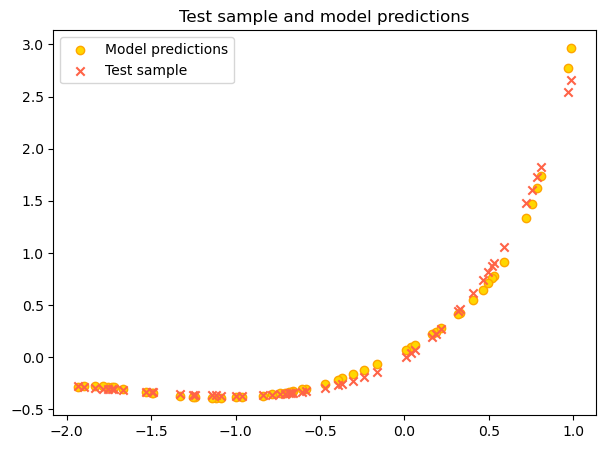

In [9]:
graph_X_values = X_test[:, 0]
graph_y_test_values = y_test
grapg_y_pred_values = y_pred

figure, ax = plt.subplots()

figure.set_figwidth(7)
figure.set_figheight(5)

ax.set_title("Test sample and model predictions")

ax.scatter(graph_X_values,
           grapg_y_pred_values,
           color="gold",
           edgecolors="orange",
           label="Model predictions")
ax.scatter(graph_X_values,
           graph_y_test_values,
           color="tomato",
           label="Test sample",
           marker="x")

ax.legend()

plt.show()

In [10]:
mse_value = mean_squared_error(y_test, y_pred)
mse_value

0.006004901602954537

In [11]:
test_data = pd.DataFrame(
    np.concatenate((X_test, y_test), axis=1),
    columns=["x", "x**2", "x**3", "x**4", "x**5", "x**6", "x**7", "y"],
)
test_data.head()

,x,x**2,x**3,x**4,x**5,x**6,x**7,y
0,-1.665428,2.773649,-4.619311,7.693128,-12.812346,21.338034,-35.536949,-0.314949
1,-0.706320,0.498888,-0.352374,0.248889,-0.175795,0.124167,-0.087702,-0.348538
2,-1.118959,1.252069,-1.401015,1.567678,-1.754168,1.962842,-2.196340,-0.365474
3,-0.583643,0.340639,-0.198812,0.116035,-0.067723,0.039526,-0.023069,-0.325592
4,0.185874,0.034549,0.006422,0.001194,0.000222,0.000041,0.000008,0.223842


In [12]:
pred_data = pd.DataFrame(
    np.concatenate((X_test, y_pred), axis=1),
    columns=["x", "x**2", "x**3", "x**4", "x**5", "x**6", "x**7", "y"],
)
pred_data.head()

,x,x**2,x**3,x**4,x**5,x**6,x**7,y
0,-1.665428,2.773649,-4.619311,7.693128,-12.812346,21.338034,-35.536949,-0.301386
1,-0.706320,0.498888,-0.352374,0.248889,-0.175795,0.124167,-0.087702,-0.337841
2,-1.118959,1.252069,-1.401015,1.567678,-1.754168,1.962842,-2.196340,-0.387880
3,-0.583643,0.340639,-0.198812,0.116035,-0.067723,0.039526,-0.023069,-0.299199
4,0.185874,0.034549,0.006422,0.001194,0.000222,0.000041,0.000008,0.247088
